# Cleaning and Analyzing Exployee Exit Surveys

## Background

Feedback from employee exit surveys can provide powerful insights into a company’s culture. It doesn't matter how excellent a company is, people are eventually going to leave. Exit surveys allow leaving employees to share their unique opinions. This can help companies in mitigating the many costs of losing other employees in the future.

![](https://images.squarespace-cdn.com/content/v1/5dd58dee80e8fe0621b369a3/1630337526747-0Y46T61FP1AFLQ9X9A77/Employee+Exiting+An+Organization?format=1000w)

Image source: [Skywalk Group](https://skywalkgroup.com/blog/post/the-importance-of-exit-interviews)

## Project and Data Overview
In this Project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia. 

The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). However, the original TAFE survey data is no longer available. Some modifications have been made to the original datasets to make them easier to work with, especially changing the encoding from *cp1252* to *UTF-8*.

My analysis is based off the work of [Israel Ogunmola](https://community.dataquest.io/u/israelogunmola).


## Business Problem
We will play the role of data analysts and pretend our stakeholders want to know the following:
- Is some dissatisfaction causing newer and older employees to resign from the institute?
- If a dissatisfaction is present, how does it vary within the different age groups at the instititute? 
- Are females more likely to resign due to dissatisfaction than males?

The stakeholders want us to combine results from both surveys and answer these questions. Although both surveys used the same template, one of them had customized answers. 

## Data Dictionary
A data dictionary wasn't provided with the dataset. In a job setting, we'd **make sure** to meet with a manager and confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

From **`dete_survey.csv`**, we will focus on the following columns:
- `ID`: An id used to identify the participant of the survey.

- `SeparationType`: The reason why the person's employment ended.

- `Cease Date`: The year or month the person's employment ended.

- `DETE Start Date`: The year the person began employment with the DETE.

From **`tafe_survey.csv`**, we will focus on the following columns:
- `Record ID`: An id used to identify the participant of the survey.

- `Reason for ceasing employment`: The reason why the person's employment ended.

- `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years).

## Summary of Findings

Age, gender, and length of service are important factors when it comes to employee satisfaction and retention, especially in the current world where employees have high expectations of sound workplace culture. 

Young employees are less willing to leave a current employer while older employees pose a higher flight risk, perhaps, driven by a search for better career opportunities or a more challenging work environment with cross-functional collaboration. Younger employees generally seek to gain more experience, acquire new skills and advance their careers, which might explain their lower tendency to resign from dissatisfaction at the early stage of their careers. 

In terms of gender, men posed a *slightly* higher flight risk than their female counterparts. They might likely be in search of higher-paying and career-accelerating opportunities to fend for their families.

## Libraries

We will start by importing some useful python libraries. `Numpy` and `Pandas` for performing mathematical operations and manipulating data; `Tabulate` for pretty-printing pandas series and dataframes; and the `Plotly` visualisation libraries for building informing visuals.

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Initial Exploartion: DETE Survey Data

In [2]:
#read the DETE dataset
dete_survey = pd.read_csv('./dete_survey.csv')

# Ensure that all columns are printed in our output
pd.set_option("display.max_columns", None)

# preview the DETE dataset
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Initial Notes
- *The dataset comprises **822 rows** and **56 columns**.*
- *The column names do not conform to the recommended python snake case convention. Infact, the naming convention here appears inconsistent*.
- *32 of the 56 columns contain missing data. Columns like `Classification`, `Business Unit`, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` have over 50% missing data*. 
- *18 of the 56 columns are stored as boolean data types. Only the `ID` column is stored as an integer. Other columns are stored as object/string data*.
- *Time data (`Cease Date`, `DETE Start Date` and `Role Start Date`) are stored as object/string data instead of datetime or numerical data*.

In [3]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Additional Notes

- *The most frequent reason for employee exit from DETE appears to be age retirement, as seen in the `SeparationType` column*.
- *Most of the respondents are 61 or older. This may further support age retirement as the most common reason for exit*.
- *The `Start Date` and `Role Start Date` columns contain alot of 'Not Stated' entries. There could be a chance that this information wasn't provided by respondents at the time of completing the survey*.
- *The last five columns, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` have only one unique value which is **'Yes'**. This might explain why they have the highest proportion of null values. Null entries in these columns might have represented **'No'** at the time the survey was administered*.
- *The most common entry from the `Professional Development` column to the `Health & Safety` column is **'A'**. This seems quite unusual as 'A' doesn't seem to represent anything. We will explore these columns further*.

To investigate the unusual 'A' entries, we can define a function `count_values()` which computes the counts of all the unique values in a series. Next, we will apply the function to all columns from `Professional Development` to `Health & Safety` column using the `Dataframe.apply()` method:

In [4]:
def count_values(column):
    '''Computes the count of all unique values in a series'''
    return column.value_counts()

# Extract the columns from Professional Development to Health and Safety using their indices.
flagged_columns = dete_survey.iloc[:, 28:49]

# Apply the function to the flagged columns
flagged_columns.apply(count_values)

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
A,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386
D,60,83,112,77,61,107,95,77,37,34,59,65,108,78,77,76,52,45,60,105,50
M,15,24,13,14,15,12,14,12,11,13,11,22,17,15,13,8,10,11,10,33,28
N,103,230,158,160,99,116,168,120,95,95,94,141,183,138,179,129,116,120,130,225,153
SA,184,100,121,115,148,162,124,179,243,244,228,157,130,156,149,144,177,165,162,78,141
SD,33,56,77,65,27,59,67,76,25,31,47,37,62,57,57,58,57,39,50,72,35


### Observations

- *From Professional Development to Health & Safety, there are 6 unique values: `A`, `D`, `M`,`N`, `SA`, `SD`*.
- *These may be aliases for the infamous survey options: **Strongly Agree (SA), Moderately agree (M), Agree (A), Neutral (N), Disagree (D) and Strongly Disagree (SD)**. Of these options, Agree (A) seems to be the most commonly selected option*.

## TAFE Survey Data

In [5]:
tafe_survey = pd.read_csv('./tafe_survey.csv')

# preview dataset info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

### Notes
- *The column names in the TAFE survey are too wordy, which makes them hard to work with. They do not follow the python snake case convention*.
- *The dataset comprises **702** rows and **72** columns*.
- *Missing values comprise 62% of the entries in the `'Contributing Factor...'` columns*.
- *70 of the 72 columns are stored as object/string data. Only the `Record ID` and `CESSATION YEAR` columns are stored as float types*.
- *Although they bear different names, some of the columns are similar to the DETE dataset. Examples include the `CESSATION YEAR`, `Reason for ceasing employment`, `Gender`, `CurrentAge`, and `EmploymentType`*.

Let's look at some quick descriptive statistics for this dataset:

In [6]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

### Additional Notes from the TAFE survey
- *Some Contributing factors are recorded as `"-"`. This might be a placeholder indicating that no answer was provided at the time ths survey was administered*.
- *Institute and WorkUnit related questions have six unique values namely: "Agree", "Neutral", "Strongly Agree", "Disagree", "Strongly Disagree" and "Not Applicable". Similar to the DETE survey, the most common entry in each of these columns is "Agree"*.
- *The column `Main Factor. Which of these was the main factor for leaving?` shows that the most frequent reason for employee exit is dissatisfaction. This column has over 80% missing entries*.
- *The `CurrentAge` column contains several age bins. Most respondents are 56 years or older*.

**Both the `dete_survey` and `tafe_survey` datasets contain many columns that we wont be needing to answer our stakeholder questions**.

## Conclusions From Initial Exploration
1.  The `dete_survey` data contains 'Not Stated' values that indicate values are missing, they should be represented as NaN.
2. Both surveys contain many similar columns, but the names are different.
3. There are many columns we wont be needing for our analysis.
4. In the `tafe_survey` there are many responses that point to resignation caused by dissatisfaction.

Let's address these observations:

## Data Cleaning
We can start by using the `pd.read_csv()` method to specify values that should be represented as NaN. We will use the method to fix missing values in the `dete_survey`. Next, we will drop columns that we don't need for our analysis. This includes columns that do not imply that an employee resigned due to dissatisfaction, columns that do not add relevant data to our analysis, and columns with too many missing entries.
## 1. Defaulting 'Not Stated' to NaN

In [7]:
dete_survey = pd.read_csv('./dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## 2. Removing Unwanted Columns

For the DETE survey, we'll drop the object/string type columns from `Professional Development [28]` to `Health & Safety [48]`. These were the columns with the infamous **Agree, Neutral, Strongly Agree, Disagree, Strongly Disagree and Not Applicable** options.

In [8]:
# Verify and print out the unwanted columns
unwanted_dete = dete_survey.columns[28:49]

print('\033[1m' + '\033[4m' +  '\033[95m' + 'Unwanted Columns in DETE Survey' + '\033[0m')
print(unwanted_dete)

Unwanted Columns in DETE Survey
Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


In [9]:
# Remove unwanted columns
dete_survey.drop(unwanted_dete, axis=1, inplace=True)
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


We will repeat the same process for TAFE, dropping columns containing similar "Agree/Disagree" data from `Main Factor [17]` to `Workplace Topic [65]`.

In [10]:
unwanted_tafe = tafe_survey.columns[17:66]

tafe_survey.drop(unwanted_tafe, axis=1, inplace=True)
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


Now let's verify the number of remaining columns in both datasets:

In [11]:
print('\033[1m' + '\033[4m' + 'REMAINING COLUMNS' + '\033[0m')
print('\033[1m' + '\033[95m' + 'DETE: {} columns'.format(dete_survey.shape[1]) + '\033[0m')
print('\033[1m' + '\033[94m' + 'TAFE: {} columns'.format(tafe_survey.shape[1]) + '\033[0m')

REMAINING COLUMNS
DETE: 35 columns
TAFE: 23 columns


## 3. Cleaning Column Names
As observed earlier, both datasets contains many of the same columns, but the column names are different. Here are some columns we'd like to use for our final analysis of both datasets:

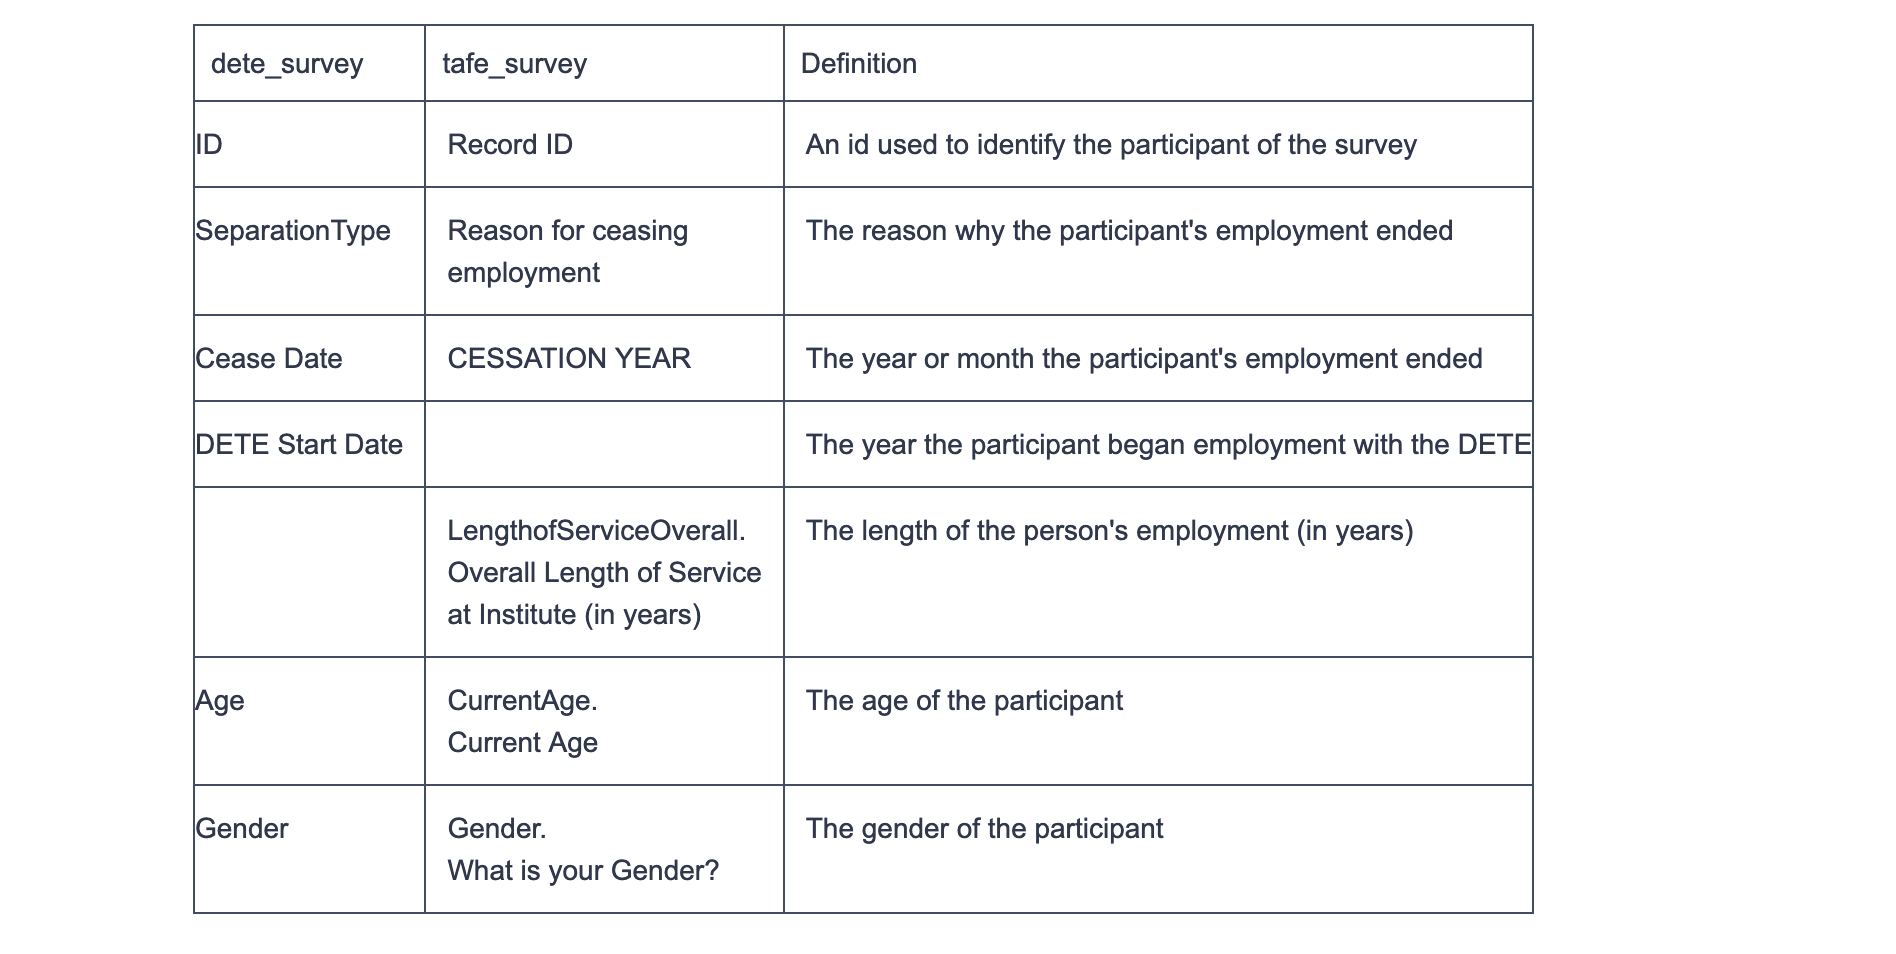
The plan is to end up combining the two datasets. To do this, we will have to standardize the column names. Let's start by formating the DETE survey column names to the proper snake case convention:

In [12]:
# Format column names
dete_survey.columns = (dete_survey.columns.str.lower()
                           .str.replace('separationtype', 'separation_type')
                           .str.replace(' ', '_')
                           .str.replace('/', '_')
                           .str.strip()
                      )

# Preview results
print('\033[1m' + '\033[4m' +  '\033[95m' + 'Renamed DETE Columns' + '\033[0m')
print(dete_survey.columns)

Renamed DETE Columns
Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Next, we will use the `DataFrame.rename()` method to update the columns in `tafe_survey`. We will focus on the similar columns for now, then handle the other columns later:

In [13]:
# Create a dictionary of columns to rename
similar_columns = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

# Rename the TAFE columns
tafe_survey.rename(similar_columns, axis=1, inplace=True)

# Preview renamed columns
print('\033[1m' + '\033[4m' +  '\033[94m' + 'Renamed TAFE Columns' + '\033[0m')
print(tafe_survey.columns)

Renamed TAFE Columns
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


## 4. Filtering the Data
One of our goals is to answer the following question:

```
Is some dissatisfaction causing newer and older employees to resign from the institute?
```

If we look at the unique values in the `separation_type` columns in each dataframe, we'll see that each dataset contains varying entries for separation type:

In [14]:
names = ['DETE SURVEY DATA', 'TAFE SURVEY DATA']

# Create a selection of colors for output headers
colors = ['\033[95m','\033[94m']

# Pretty print unique values in the seperation_type column of both datasets
for df, name, color in zip([dete_survey, tafe_survey], names,  colors):
    print('\033[1m' + '\033[4m' +  color + name + '\033[0m')
    print(tabulate(df['separation_type'].value_counts(dropna=False).to_frame(), 
                   headers=['Separation Type', 'Count'], tablefmt='psql'))

DETE SURVEY DATA
+--------------------------------------+---------+
| Separation Type                      |   Count |
|--------------------------------------+---------|
| Age Retirement                       |     285 |
| Resignation-Other reasons            |     150 |
| Resignation-Other employer           |      91 |
| Resignation-Move overseas/interstate |      70 |
| Voluntary Early Retirement (VER)     |      67 |
| Ill Health Retirement                |      61 |
| Other                                |      49 |
| Contract Expired                     |      34 |
| Termination                          |      15 |
+--------------------------------------+---------+
TAFE SURVEY DATA
+--------------------------+---------+
| Separation Type          |   Count |
|--------------------------+---------|
| Resignation              |     340 |
| Contract Expired         |     127 |
| Retrenchment/ Redundancy |     104 |
| Retirement               |      82 |
| Transfer                 |  

We will only analyze survey respondents who resigned. Their separation type contains the string `'Resignation'`. We can see multiple uses of the word in the different seperation types:
- `Resignation`

- `Resignation-Other reasons`

- `Resignation-Other employer`

- `Resignation-Move overseas/interstate`

We have to account for each of these variations so we don't unintentionally drop useful data.

In [15]:
# Select entries starting with resignation in both datasets.
dete_resignations = dete_survey[dete_survey['separation_type'].str.startswith('Resignation')].copy()
tafe_resignations = tafe_survey[tafe_survey['separation_type'].str.startswith('Resignation', na=False)].copy()
# Copy was added above to deal with settings with copy warnings.

# Pretty print unique values in the seperation_type column of both datasets
for df, name, color in zip([dete_resignations, tafe_resignations], names,  colors):
    print('\033[1m' + '\033[4m' +  color + name + '\033[0m')
    print(tabulate(df['separation_type'].value_counts(dropna=False).to_frame(), 
                   headers=['Separation Type', 'Count'], tablefmt='psql'))

DETE SURVEY DATA
+--------------------------------------+---------+
| Separation Type                      |   Count |
|--------------------------------------+---------|
| Resignation-Other reasons            |     150 |
| Resignation-Other employer           |      91 |
| Resignation-Move overseas/interstate |      70 |
+--------------------------------------+---------+
TAFE SURVEY DATA
+-------------------+---------+
| Separation Type   |   Count |
|-------------------+---------|
| Resignation       |     340 |
+-------------------+---------+


## 5. Verifying the Date Columns
In this step, we'll focus on verifying that the years in the `cease_date`, `dete_start_date` and `role_start_date` are correctly entered. 
- Since the cease date is the last year of the person's employment and the DETE start date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in the education field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

Lets start by taking a look at the `cease_date` column in the DETE dataset:

In [16]:
# Define a function that pretty prints a pandas series to a readable format
def pretty_print(data, headings, color, title):
    """
    Pretty-prints a Pandas series in a more readable format
        Params:
            :data (series): Pandas series of interest
            :headings (list): List of column names to use in output
            :color (string): Python formatted output color code
            :title (string): Title of output table
        Output:
            Returns pretty-printed series with assigned column names.
    """
    print('\033[1m' + '\033[4m' +  color + title + '\033[0m')
    print(tabulate(data.to_frame(), headers=headings, tablefmt='pretty', stralign='left'))

# Pretty print the cease dates in DETE data.
pretty_print(dete_resignations['cease_date'].value_counts(),
             ['cease_date', 'Count'], colors[0], 
             'DETE: Cease Date')

DETE: Cease Date
+------------+-------+
| cease_date | Count |
+------------+-------+
| 2012       | 126   |
| 2013       | 74    |
| 01/2014    | 22    |
| 12/2013    | 17    |
| 06/2013    | 14    |
| 09/2013    | 11    |
| 07/2013    | 9     |
| 11/2013    | 9     |
| 10/2013    | 6     |
| 08/2013    | 4     |
| 05/2012    | 2     |
| 05/2013    | 2     |
| 07/2012    | 1     |
| 2010       | 1     |
| 09/2010    | 1     |
| 07/2006    | 1     |
+------------+-------+


### Observation

- *The dates do not follow a uniform pattern. Some dates are entered as years, while some are entered in the MM/YYYY format*. 

To avoid further confusion down the line, we will clean this column, extract only the year values and convert the datatype to float (float makes it easier to work with NaN entries). 

In [17]:
# Create a regex to extract the year
year_pattern = r"([0-9]{4})"

# Extract the year and assign data type as float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

# Preview the modified column
pretty_print(dete_resignations['cease_date'].value_counts().sort_index(),
             ['Cease_date', 'Count'], colors[0], 
             'DETE: Cease Date - After Cleaning')

print('Datatype: {}'.format(dete_resignations['cease_date'].dtype))

DETE: Cease Date - After Cleaning
+------------+-------+
| Cease_date | Count |
+------------+-------+
| 2006.0     | 1     |
| 2010.0     | 2     |
| 2012.0     | 129   |
| 2013.0     | 146   |
| 2014.0     | 22    |
+------------+-------+
Datatype: float64


Next, we will explore the `cease_date` column of TAFE resignation data.

In [18]:
pretty_print(tafe_resignations['cease_date'].value_counts().sort_index(),
             ['cease_date', 'Count'], colors[1], 
             'TAFE: Cease Date')

print('Datatype: {}'.format(tafe_resignations['cease_date'].dtype))

TAFE: Cease Date
+------------+-------+
| cease_date | Count |
+------------+-------+
| 2009.0     | 2     |
| 2010.0     | 68    |
| 2011.0     | 116   |
| 2012.0     | 94    |
| 2013.0     | 55    |
+------------+-------+
Datatype: float64


The TAFE cease dates look fine. They are uniformly formatted too. Let's dive-in to explore the `dete_start_date` column of the DETE resignation data.

In [19]:
pretty_print(dete_resignations['dete_start_date'].value_counts().sort_index(),
             ['Start Date', 'Count'], colors[0], 
             'DETE: Start Date')

print('Datatype: {}'.format(dete_resignations['dete_start_date'].dtype))

DETE: Start Date
+------------+-------+
| Start Date | Count |
+------------+-------+
| 1963.0     | 1     |
| 1971.0     | 1     |
| 1972.0     | 1     |
| 1973.0     | 1     |
| 1974.0     | 2     |
| 1975.0     | 1     |
| 1976.0     | 2     |
| 1977.0     | 1     |
| 1980.0     | 5     |
| 1982.0     | 1     |
| 1983.0     | 2     |
| 1984.0     | 1     |
| 1985.0     | 3     |
| 1986.0     | 3     |
| 1987.0     | 1     |
| 1988.0     | 4     |
| 1989.0     | 4     |
| 1990.0     | 5     |
| 1991.0     | 4     |
| 1992.0     | 6     |
| 1993.0     | 5     |
| 1994.0     | 6     |
| 1995.0     | 4     |
| 1996.0     | 6     |
| 1997.0     | 5     |
| 1998.0     | 6     |
| 1999.0     | 8     |
| 2000.0     | 9     |
| 2001.0     | 3     |
| 2002.0     | 6     |
| 2003.0     | 6     |
| 2004.0     | 14    |
| 2005.0     | 15    |
| 2006.0     | 13    |
| 2007.0     | 21    |
| 2008.0     | 22    |
| 2009.0     | 13    |
| 2010.0     | 17    |
| 2011.0     | 24    |
| 2012.0     | 21

Again, the dates seem realistic and uniformly formatted. Nothing to do here. Let's explore the `role_start_date` column of the DETE resignation data.

In [20]:
pretty_print(dete_resignations['role_start_date'].value_counts().sort_index(),
             ['Role Start Date', 'Count'], colors[0], 
             'DETE: Role Start Date')

print('Datatype: {}'.format(dete_resignations['role_start_date'].dtype))

DETE: Role Start Date
+-----------------+-------+
| Role Start Date | Count |
+-----------------+-------+
| 200.0           | 1     |
| 1976.0          | 2     |
| 1980.0          | 1     |
| 1982.0          | 1     |
| 1986.0          | 1     |
| 1987.0          | 2     |
| 1988.0          | 3     |
| 1989.0          | 5     |
| 1990.0          | 1     |
| 1991.0          | 1     |
| 1992.0          | 4     |
| 1993.0          | 3     |
| 1994.0          | 2     |
| 1996.0          | 3     |
| 1997.0          | 5     |
| 1998.0          | 4     |
| 1999.0          | 6     |
| 2000.0          | 1     |
| 2001.0          | 2     |
| 2002.0          | 7     |
| 2003.0          | 6     |
| 2004.0          | 10    |
| 2005.0          | 9     |
| 2006.0          | 7     |
| 2007.0          | 24    |
| 2008.0          | 21    |
| 2009.0          | 18    |
| 2010.0          | 27    |
| 2011.0          | 33    |
| 2012.0          | 37    |
| 2013.0          | 24    |
+-----------------+-------

### Observation
- *One entry in this column seems unusual. The role start date is 200. This could have occurred due a data entry error at the time of completing the survey.*

Since there is only one entry with this error, we can safely remove the record from our dataset:

In [21]:
# Eliminate the entry where the role start date is 200
dete_resignations = dete_resignations.query('role_start_date != 200')

pretty_print(dete_resignations['role_start_date'].value_counts().sort_index(),
             ['Role Start Date', 'Count'], colors[0], 
             'DETE: Role Start Date - After cleaning')

DETE: Role Start Date - After cleaning
+-----------------+-------+
| Role Start Date | Count |
+-----------------+-------+
| 1976.0          | 2     |
| 1980.0          | 1     |
| 1982.0          | 1     |
| 1986.0          | 1     |
| 1987.0          | 2     |
| 1988.0          | 3     |
| 1989.0          | 5     |
| 1990.0          | 1     |
| 1991.0          | 1     |
| 1992.0          | 4     |
| 1993.0          | 3     |
| 1994.0          | 2     |
| 1996.0          | 3     |
| 1997.0          | 5     |
| 1998.0          | 4     |
| 1999.0          | 6     |
| 2000.0          | 1     |
| 2001.0          | 2     |
| 2002.0          | 7     |
| 2003.0          | 6     |
| 2004.0          | 10    |
| 2005.0          | 9     |
| 2006.0          | 7     |
| 2007.0          | 24    |
| 2008.0          | 21    |
| 2009.0          | 18    |
| 2010.0          | 27    |
| 2011.0          | 33    |
| 2012.0          | 37    |
| 2013.0          | 24    |
+-----------------+-------+


## 6. Visualizing the Date Columns

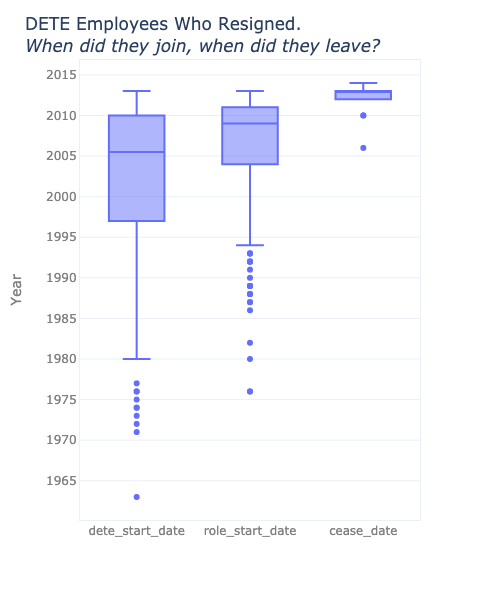

In [22]:
dete_dates = dete_resignations[['dete_start_date', 'role_start_date', 'cease_date']]

fig = px.box(dete_dates, y=dete_dates.columns, width=500, height=600, template='plotly_white')
fig.update_layout(title='DETE Employees Who Resigned.<br><i>When did they join, when did they leave?')
fig.update_yaxes(dtick=5, color='gray', title='Year', showline=True, mirror=True)
fig.update_xaxes(title='', color='gray', showline=True, mirror=True)

fig.show('png')

### Observations
- *Majority of the employees who resigned had joined DETE between the late **1990's** and **2010**. Between year 2010 and 2014, a large percentage of these employees had resigned from the institution*.

Since we do not have detailed information on the job start dates from the TAFE resignation data. We cannot build a comprehensive visualization for the TAFE survey.

## 7. Estimating Years of Service
Now that we've verified the different date data from the two datasets. We can safely calculate the length of time that each survey respondent (employee) spent at the institute.

The `tafe_resignations` dataframe already contains an *`institute_service`* column. However, `dete_resignations` does not contain such information at the moment. Luckily we can extrapolate this from the *`dete_start_date`* and *`cease_date`* columns. This will prove useful in the long run, when we have to analyze both surveys together.

In [23]:
# Compute the institute service years for the DETE resignation data
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

pretty_print(dete_resignations['institute_service'].value_counts(bins=5),
             ['Institute service', 'Count'], colors[0], 
             'DETE: Institute Service')


DETE: Institute Service
+-------------------+-------+
| Institute service | Count |
+-------------------+-------+
| (-0.05, 9.8]      | 167   |
| (9.8, 19.6]       | 55    |
| (19.6, 29.4]      | 32    |
| (29.4, 39.2]      | 15    |
| (39.2, 49.0]      | 3     |
+-------------------+-------+


### Observations
- *167 employees (about 54%) who resigned from DETE had not worked up to 10 years. The remaining 46% had worked for more than 10 years before resigning*.

Let's explore the institute service pattern at TAFE:

In [24]:
pretty_print(tafe_resignations['institute_service'].value_counts(dropna=False),
             ['Institute service', 'Count'], colors[1], 
             'TAFE: Institute Service')

TAFE: Institute Service
+--------------------+-------+
| Institute service  | Count |
+--------------------+-------+
| Less than 1 year   | 73    |
| 1-2                | 64    |
| 3-4                | 63    |
| nan                | 50    |
| 5-6                | 33    |
| 11-20              | 26    |
| 7-10               | 21    |
| More than 20 years | 10    |
+--------------------+-------+


### Observations
- *Although we have 50 missing entries, there is a more exaggerated pattern in the TAFE data. A whooping 68% (233 in 340 employees who resigned) did not work up to 10 years at TAFE. Only 20% of resigning employees had worked more than 10 years*.

## 8. Identifying Dissatisfied Employees <a id='ref'>

Now, we will try to identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to make this assessment:

TAFE

- `Contributing Factors. Dissatisfaction`

- `Contributing Factors. Job Dissatisfaction`

DETE

- `job_dissatisfaction`

- `dissatisfaction_with_the_department`

- `physical_work_environment`

- `lack_of_recognition`

- `lack_of_job_security`

- `work_location`

- `employment_conditions`

- `work_life_balance`

- `workload`

If an employee indicated that any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the `dissatisfied` column will contain just the following values:

- `True:` indicates a person resigned because they were dissatisfied with the job

- `False:` indicates a person resigned because of a reason other than dissatisfaction with the job

In [25]:
# DETE columns related to dissatisfaction
dissatisfied_dete = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]

# TAFE columns related to dissatisfaction
dissatisfied_tafe = [
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]

# Preview the unique entries in the DETE columns
for column in dissatisfied_dete:
    pretty_print(dete_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'DETE: '+ column)

DETE: job_dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 269   |
| True          | 41    |
+---------------+-------+
DETE: dissatisfaction_with_the_department
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 281   |
| True          | 29    |
+---------------+-------+
DETE: physical_work_environment
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 304   |
| True          | 6     |
+---------------+-------+
DETE: lack_of_recognition
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 277   |
| True          | 33    |
+---------------+-------+
DETE: lack_of_job_security
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 296   |
| True          | 14    |
+---------------+-------+
DETE: work_location
+---------------+-------+
| Unique Values | Cou

We won't need need to clean these DETE resignation columns further. They all appear to be in the right format. For now, let's explore the TAFE columns that we are interested in:

In [26]:
for column in dissatisfied_tafe:
    pretty_print(tafe_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'TAFE: '+ column)

TAFE: Contributing Factors. Dissatisfaction
+---------------------------------------+-------+
| Unique Values                         | Count |
+---------------------------------------+-------+
| -                                     | 277   |
| Contributing Factors. Dissatisfaction | 55    |
| nan                                   | 8     |
+---------------------------------------+-------+
TAFE: Contributing Factors. Job Dissatisfaction
+---------------------+-------+
| Unique Values       | Count |
+---------------------+-------+
| -                   | 270   |
| Job Dissatisfaction | 62    |
| nan                 | 8     |
+---------------------+-------+


We can easily intuit that the `"-"` entries are analogous to a respondent answering as `"False"`, while any other string entry will equate to `"True"`. Let's update these columns to `True`, `False` or `NaN` values:

In [27]:
# A function to update '-' as False and other string entries to True
def map_boolean(entry):
    if entry == '-':
        return False
    elif pd.isnull(entry):
        return np.nan
    else:
        return True

# Apply function and print preview
for column in dissatisfied_tafe:
    tafe_resignations[column] = tafe_resignations[column].map(map_boolean)
    pretty_print(tafe_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'TAFE: '+ column)

TAFE: Contributing Factors. Dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 277   |
| True          | 55    |
| nan           | 8     |
+---------------+-------+
TAFE: Contributing Factors. Job Dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 270   |
| True          | 62    |
| nan           | 8     |
+---------------+-------+


Finally, we can create the `dissatisfied` column in both datasets. *Remember, once any of the employee dissatisfaction questions equates to True, the dissatisfied column will also contain True, otherwise False*. For ease, we will use the `Dataframe.any()` method to make this possible.

In [28]:
# Create a dissatisfied column and evaluate to True or False
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfied_tafe].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[dissatisfied_dete].any(axis=1, skipna=False)

# Preview the newly created column
for df, name, color in zip([dete_resignations, tafe_resignations], ['DETE', 'TAFE'], [0,1]):
    pretty_print(df['dissatisfied'].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[color], 
            name+': Dissatisfied Column')

DETE: Dissatisfied Column
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 161   |
| True          | 149   |
+---------------+-------+
TAFE: Dissatisfied Column
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 241   |
| True          | 99    |
+---------------+-------+


## 9. Formatting the Age Columns
Among others, our stakeholders expect us to answer the following question:
```
If a dissatisfaction is present, how does it vary within the different age groups at the instititute? 
```
To accurately provide an answer to this, we need to ensure that `age` information is properly formatted in both datasets. Let's start by previewing the entries for age.

In [29]:
pretty_print(dete_resignations['age'].value_counts(dropna=False).sort_index(),
             ['Age group', 'Count'], colors[0], 
             'DETE: Age Groups')

pretty_print(tafe_resignations['age'].value_counts(dropna=False).sort_index(),
             ['Age group', 'Count'], colors[1], 
             'TAFE: Age Groups')

DETE: Age Groups
+---------------+-------+
| Age group     | Count |
+---------------+-------+
| 20 or younger | 1     |
| 21-25         | 29    |
| 26-30         | 35    |
| 31-35         | 29    |
| 36-40         | 41    |
| 41-45         | 48    |
| 46-50         | 41    |
| 51-55         | 32    |
| 56-60         | 26    |
| 61 or older   | 23    |
| nan           | 5     |
+---------------+-------+
TAFE: Age Groups
+---------------+-------+
| Age group     | Count |
+---------------+-------+
| 20 or younger | 9     |
| 21  25        | 33    |
| 26  30        | 32    |
| 31  35        | 32    |
| 36  40        | 32    |
| 41  45        | 45    |
| 46  50        | 39    |
| 51-55         | 39    |
| 56 or older   | 29    |
| nan           | 50    |
+---------------+-------+


### Observations
- *Although, the age groups in the datasets are mostly similar, the formats are not exactly the same. The age groups in the TAFE dataset contain extra space characters e.g `21  25`. We should reformat these entries to agree with that of the DETE dataset e.g `21-25`*. 

- *In the TAFE data, age brackets end at `56 or older` while the DETE data has two extra age groups `56-60` and `61 or older`. We should make the age groups uniform in both datasets by formatting the two extra groups in DETE data to `56 or older`*.

In [30]:
# Remove the extra space characters from TAFE age data
tafe_resignations['age'] = tafe_resignations['age'].str.replace('  ', '-')

# Format the extra age brackets in DETE data to 56 or older
dete_resignations['age'] = (dete_resignations['age'].str.replace('56-60', '56 or older')
                                                    .str.replace('61 or older', '56 or older')
                           )


# Re-examine the age columns again.
pretty_print(dete_resignations['age'].value_counts(dropna=False).sort_index(),
             ['Age group', 'Count'], colors[0], 
             'DETE: Age Groups - post cleaning')

pretty_print(tafe_resignations['age'].value_counts(dropna=False).sort_index(),
             ['Age group', 'Count'], colors[1], 
             'TAFE: Age Groups - post cleaning')

DETE: Age Groups - post cleaning
+---------------+-------+
| Age group     | Count |
+---------------+-------+
| 20 or younger | 1     |
| 21-25         | 29    |
| 26-30         | 35    |
| 31-35         | 29    |
| 36-40         | 41    |
| 41-45         | 48    |
| 46-50         | 41    |
| 51-55         | 32    |
| 56 or older   | 49    |
| nan           | 5     |
+---------------+-------+
TAFE: Age Groups - post cleaning
+---------------+-------+
| Age group     | Count |
+---------------+-------+
| 20 or younger | 9     |
| 21-25         | 33    |
| 26-30         | 32    |
| 31-35         | 32    |
| 36-40         | 32    |
| 41-45         | 45    |
| 46-50         | 39    |
| 51-55         | 39    |
| 56 or older   | 29    |
| nan           | 50    |
+---------------+-------+


**Note:** The age groups are quite numerous, partly because they are mostly spaced at an interval of 5. This might make it difficult to observe some trends during analysis (since each group is not quite large enough). We will correct for these by creating an age structure later on.

## 10. Combining the Datasets
Combining will also mean combining columns that are not common to both datasets. This would lead to a lot of null values. It is better to investigate each dataset column, then select only the common columns that are useful for our analysis. To select the common columns, we will use the `np.intersect1d()` method.

In [31]:
# Preview all columns in DETE data
print('\033[1m' + '\033[4m' +  colors[0] + 'DETE Resignation Columns' + '\033[0m')
print(dete_resignations.columns)
print('')

# Preview all columns in TAFE data
print('\033[1m' + '\033[4m' +  colors[1] + 'TAFE Resignation Columns' + '\033[0m')
print(tafe_resignations.columns)
print('')

# Find the intersect (common items) in both columns
common_columns = np.intersect1d(dete_resignations.columns, tafe_resignations.columns)

# Preview the common columns
print('\033[1m' + '\033[4m' + '\033[91m' + 'COMMON COLUMNS' + '\033[0m')
for num, column in zip(range(1, 10), common_columns):
    print('\033[91m' + str(num) + ': ' + column + '\033[0m')

DETE Resignation Columns
Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

TAFE Resignation Columns
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. 

We are almost ready to combine our datasets. In a two step process, we will isolate the common columns from each dataset, then create an `institute` column. This will help us distinguish the source of each data after combining:

In [32]:
# Select only common columns from each dataset
dete_updated = dete_resignations[common_columns].copy()
tafe_updated = tafe_resignations[common_columns].copy()

# Add an institute column in each dataset
dete_updated['institute'] = 'DETE'
tafe_updated['institute'] = 'TAFE'

dete_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute_service,position,separation_type,institute
3,36-40,2012.0,False,Permanent Full-time,Female,4,7.0,Teacher,Resignation-Other reasons,DETE
5,41-45,2012.0,True,Permanent Full-time,Female,6,18.0,Guidance Officer,Resignation-Other reasons,DETE
8,31-35,2012.0,False,Permanent Full-time,Female,9,3.0,Teacher,Resignation-Other reasons,DETE
9,46-50,2012.0,True,Permanent Part-time,Female,10,15.0,Teacher Aide,Resignation-Other employer,DETE
11,31-35,2012.0,False,Permanent Full-time,Male,12,3.0,Teacher,Resignation-Move overseas/interstate,DETE


In [33]:
tafe_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute_service,position,separation_type,institute
3,NaN,2010.0,False,NaN,NaN,6.341399e+17,NaN,NaN,Resignation,TAFE
4,41-45,2010.0,False,Permanent Full-time,Male,6.341466e+17,3-4,Teacher (including LVT),Resignation,TAFE
5,56 or older,2010.0,False,Contract/casual,Female,6.341475e+17,7-10,Teacher (including LVT),Resignation,TAFE
6,20 or younger,2010.0,False,Temporary Full-time,Male,6.341520e+17,3-4,Administration (AO),Resignation,TAFE
7,46-50,2010.0,False,Permanent Full-time,Male,6.341537e+17,3-4,Teacher (including LVT),Resignation,TAFE


From the output above, we'd notice that the `institute_service` column currently contains entries that are not uniformly formatted accross both datasets. **We will deal with this later**. For now, we are ready to combine our datasets.

We can use the `pd.concat()` function to stack our dataframes on one another, essentially combining them into one unit:

In [34]:
combined = pd.concat([dete_updated, tafe_updated])
combined.head(3)

,age,cease_date,dissatisfied,employment_status,gender,id,institute_service,position,separation_type,institute
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,7.0,Teacher,Resignation-Other reasons,DETE
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,18.0,Guidance Officer,Resignation-Other reasons,DETE
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,3.0,Teacher,Resignation-Other reasons,DETE


In [35]:
combined.tail(3)

,age,cease_date,dissatisfied,employment_status,gender,id,institute_service,position,separation_type,institute
698,NaN,2013.0,False,NaN,NaN,6.350677e+17,NaN,NaN,Resignation,TAFE
699,51-55,2013.0,False,Permanent Full-time,Female,6.350704e+17,5-6,Teacher (including LVT),Resignation,TAFE
701,26-30,2013.0,False,Contract/casual,Female,6.350730e+17,3-4,Administration (AO),Resignation,TAFE


## 11. Dropping the ID column
The `ID` column does not add anything of value to our analysis. Let's drop it before we proceed.

In [36]:
combined.drop('id', axis=1, inplace=True)

## 12. Cleaning Institute Service Info
Now that we have combined our dataframes and removed the `id` column. The next step is to clean up `institute_service`. Let's preview this column to have an idea of what we will be working with.

In [37]:
pretty_print(combined['institute_service'].value_counts(dropna=False),
             ['Institute service', 'Count'], colors[1], 
             'Institute Service Entries')

Institute Service Entries
+--------------------+-------+
| Institute service  | Count |
+--------------------+-------+
| nan                | 88    |
| Less than 1 year   | 73    |
| 1-2                | 64    |
| 3-4                | 63    |
| 5-6                | 33    |
| 11-20              | 26    |
| 5.0                | 23    |
| 1.0                | 22    |
| 7-10               | 21    |
| 3.0                | 20    |
| 0.0                | 20    |
| 6.0                | 17    |
| 4.0                | 16    |
| 9.0                | 14    |
| 2.0                | 14    |
| 7.0                | 13    |
| More than 20 years | 10    |
| 8.0                | 8     |
| 13.0               | 7     |
| 15.0               | 7     |
| 20.0               | 7     |
| 10.0               | 6     |
| 14.0               | 6     |
| 12.0               | 6     |
| 17.0               | 6     |
| 22.0               | 6     |
| 18.0               | 5     |
| 16.0               | 5     |
| 11.0       

This column is tricky to clean because it currently contains values that are formatted in different ways. Rather than cleaning this column alone, we will further convert the numbers into various service categories. 

We can draw insights from [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the following definitions:

- `New:` Less than 3 years at a company

- `Experienced:` 3-6 years at a company

- `Established:` 7-10 years at a company

- `Veteran:` 11 or more years at a company

We can now clean and categorize the values in the *`institute_service`* column using the definitions above:

In [38]:
pattern = r"(\d+)" # matches one or more repetitions of numbers between the range [0-9]

# Extract values from institute service based on the defined pattern
combined['institute_service'] = (combined['institute_service'].astype('str')
                                                              .str.extract(pattern)
                                                              .astype(float)                                
                                )

# Preview results
pretty_print(combined['institute_service'].value_counts(dropna=False),
             ['Institute service', 'Count'], colors[1], 
             'Institute Service Entries - After cleaning')

Institute Service Entries - After cleaning
+-------------------+-------+
| Institute service | Count |
+-------------------+-------+
| 1.0               | 159   |
| nan               | 88    |
| 3.0               | 83    |
| 5.0               | 56    |
| 7.0               | 34    |
| 11.0              | 30    |
| 0.0               | 20    |
| 6.0               | 17    |
| 20.0              | 17    |
| 4.0               | 16    |
| 2.0               | 14    |
| 9.0               | 14    |
| 8.0               | 8     |
| 15.0              | 7     |
| 13.0              | 7     |
| 17.0              | 6     |
| 22.0              | 6     |
| 14.0              | 6     |
| 12.0              | 6     |
| 10.0              | 6     |
| 18.0              | 5     |
| 16.0              | 5     |
| 23.0              | 4     |
| 24.0              | 4     |
| 21.0              | 3     |
| 39.0              | 3     |
| 19.0              | 3     |
| 32.0              | 3     |
| 30.0              | 2    

Next, we'll map each value to one of the career stage definitions namely: **New, experienced, established and veteran**.

In [39]:
def map_career_state(value):
    '''Maps value to a corresponding service category'''
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return 'New'
    elif (value >=3 and value <=6):
        return 'Experienced'
    elif (value >=7 and value <=10):
        return 'Established'
    else:
        return 'Veteran'

# Apply function to the combined dataframe
combined['service_category'] = combined['institute_service'].apply(map_career_state)

pretty_print(combined['service_category'].value_counts(dropna=False),
             ['Category', 'Count'], colors[1], 
             'Entries For Service Category')

Entries For Service Category
+-------------+-------+
| Category    | Count |
+-------------+-------+
| New         | 193   |
| Experienced | 172   |
| Veteran     | 135   |
| nan         | 88    |
| Established | 62    |
+-------------+-------+


## 13. Dealing with Missing Data

In [40]:
combined.isnull().sum()

age                  55
cease_date           16
dissatisfied          0
employment_status    54
gender               59
institute_service    88
position             53
separation_type       0
institute             0
service_category     88
dtype: int64

Having some information about age can help us estimate how long an employee may have served at an institute (institute service) and vice versa. However, we will notice that both information are missing from some records. In the absence of both data, these records will be hard to analyze. Hence will remove records with missing information for age and service category.

In [41]:
# Extract records where age and service category are missing
missing_service_data = combined[(combined['age'].isnull() & combined['service_category'].isnull())]

print('\033[1m' + '\033[91m' + str(missing_service_data.shape[0]) + ' records meet this criteria' + '\033[0m')
missing_service_data

53 records meet this criteria


,age,cease_date,dissatisfied,employment_status,gender,institute_service,position,separation_type,institute,service_category
405,NaN,2012.0,False,NaN,NaN,NaN,Teacher,Resignation-Other reasons,DETE,NaN
802,NaN,2013.0,False,Permanent Part-time,NaN,NaN,Teacher Aide,Resignation-Move overseas/interstate,DETE,NaN
821,NaN,2013.0,False,NaN,NaN,NaN,Teacher Aide,Resignation-Move overseas/interstate,DETE,NaN
3,NaN,2010.0,False,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
16,NaN,2010.0,True,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
18,NaN,2010.0,True,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
19,NaN,2010.0,False,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
20,NaN,2010.0,True,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
21,NaN,2010.0,False,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN
26,NaN,2010.0,True,NaN,NaN,NaN,NaN,Resignation,TAFE,NaN


These 53 records contain a lot of missing data. It is clear that they wont be useful for our analysis, so we will drop them all from our dataframe:

In [42]:
# Select only records with information on age and service category
combined = combined[(combined['age'].notnull() & combined['service_category'].notnull())]

print('\033[1m' + '\033[4m' +  '\033[94m' + 'Null Values in our Combined Dataframe' + '\033[0m')
combined.isnull().sum()

Null Values in our Combined Dataframe


age                  0
cease_date           2
dissatisfied         0
employment_status    0
gender               5
institute_service    0
position             3
separation_type      0
institute            0
service_category     0
dtype: int64

By dealing with null values in the age and service_category columns. We have **significantly** reduced the number of null records from our dataset. Next, we will deal with the few null values left.

We won't be needing the `cease_date` column to answer our stakeholder questions. However, the `gender` and `position` columns are important. We may decide to fill the missing gender records with the most common gender. However, this would not be a safe way to extrapolate the missing gender records, instead we will drop the *5* records with missing gender entries.

In [43]:
combined = combined[combined['gender'].notnull()]

print('\033[1m' + '\033[4m' +  '\033[94m' + 'Null Values left after cleaning' + '\033[0m')
combined.isnull().sum()

Null Values left after cleaning


age                  0
cease_date           2
dissatisfied         0
employment_status    0
gender               0
institute_service    0
position             3
separation_type      0
institute            0
service_category     0
dtype: int64

## 14. Dealing With the Position Column

We will categorize entries in the `position` column into `teaching` and `non-teaching staff`. We only have *3* missing records in this column so it will be safe to map them as non-teaching staff. Let's view the unique values in this column again:

In [44]:
pretty_print(combined['position'].value_counts(dropna=False),
             ['position', 'Count'], colors[1], 
             'Unique entries in the position column')

Unique entries in the position column
+---------------------------------------------------------+-------+
| position                                                | Count |
+---------------------------------------------------------+-------+
| Administration (AO)                                     | 148   |
| Teacher                                                 | 111   |
| Teacher (including LVT)                                 | 95    |
| Teacher Aide                                            | 49    |
| Cleaner                                                 | 33    |
| Public Servant                                          | 27    |
| Professional Officer (PO)                               | 16    |
| Operational (OO)                                        | 13    |
| Head of Curriculum/Head of Special Education            | 10    |
| Technical Officer                                       | 7     |
| Workplace Training Officer                              | 6     |
| Schools 

Here is how we will proceed with our mapping: Any entry that contains the term **Teacher, Tutor, Training, and Guidance** will be mapped as `Teaching staff`. All other entries will be recorded as `Non-Teaching staff`. The mapped information will be stored in a new `role` column.

In [45]:
teaching_roles = ['Teacher', 'Teacher (including LVT)', 'Teacher Aide', 'Guidance Officer', 'Tutor',
                 'Workplace Training Officer']

def map_position(entry):
    ''''categorizes entry under teaching or non-teaching staff'''
    
    if pd.isnull(entry):
        return 'Non-Teaching staff'
    elif entry.strip() in teaching_roles:
        return 'Teaching staff'
    else:
        return 'Non-Teaching staff'

# Apply function to the position column
combined['role'] = combined['position'].apply(map_position)

# Preview results
pretty_print(combined['role'].value_counts(dropna=False),
             ['Role', 'Count'], colors[1], 
             'Entries in the role column')

Entries in the role column
+--------------------+-------+
| Role               | Count |
+--------------------+-------+
| Non-Teaching staff | 288   |
| Teaching staff     | 267   |
+--------------------+-------+


## 15. Normalising Employment Status

In [46]:
pretty_print(combined['employment_status'].value_counts(dropna=False),
             ['Status', 'Count'], colors[1], 
             'Entries in the employment status column')

Entries in the employment status column
+---------------------+-------+
| Status              | Count |
+---------------------+-------+
| Permanent Full-time | 240   |
| Permanent Part-time | 128   |
| Temporary Full-time | 119   |
| Temporary Part-time | 35    |
| Contract/casual     | 29    |
| Casual              | 4     |
+---------------------+-------+


There is not much to correct here. However, we can see that there is an overlap between the `Contract/casual` group and the `casual` group. For uniformity sake, we will reformat all the `Casual` entries as `Contract/casual`:

In [47]:
# Replace casual with contract/casual
combined['employment_status'] = combined['employment_status'].str.replace('Casual', 'Contract/casual')

pretty_print(combined['employment_status'].value_counts(dropna=False),
             ['Status', 'Count'], colors[1], 
             'Entries in the employment status column - After cleaning')

Entries in the employment status column - After cleaning
+---------------------+-------+
| Status              | Count |
+---------------------+-------+
| Permanent Full-time | 240   |
| Permanent Part-time | 128   |
| Temporary Full-time | 119   |
| Temporary Part-time | 35    |
| Contract/casual     | 33    |
+---------------------+-------+


## 16. Creating an Age Structure

As a final step in our data preparation and cleaning process, we will create a standard age structure to correct for the numerous age groups we currently have in our data. We will follow some standard structures used by [indexmundi.com](https://www.indexmundi.com/united_kingdom/age_structure.html) for classifying age in relation to demographics. A few modifications will be made to suit our use case:

1. `25 years or less`: Early working age

2. `26-55 years`: Prime working age

3. `56 years or older`: Mature or elderly working age

We can create a dictionary with this information, and map it to a new column in our dataframe:

In [48]:
# Create the mapping dictionary
age_structure = {
    '20 or younger': 'Early working age',
    '21-25': 'Early working age',
    '26-30': 'Prime working age',
    '31-35': 'Prime working age',
    '36-40': 'Prime working age',
    '41-45': 'Prime working age',
    '46-50': 'Prime working age',
    '51-55': 'Prime working age',
    '56 or older': 'Elderly working age'
}

# Map dictionary contents to a new column
combined['age_structure'] = combined['age'].map(age_structure)

# Preview results
pretty_print(combined['age_structure'].value_counts(dropna=False),
             ['Age structure', 'Count'], colors[1], 
             'Entries in the age structure column')

Entries in the age structure column
+---------------------+-------+
| Age structure       | Count |
+---------------------+-------+
| Prime working age   | 419   |
| Early working age   | 69    |
| Elderly working age | 67    |
+---------------------+-------+


*It is not too surprising that the majority of employees are in their prime working age. They are **Probably** resigning to pursue other career interests, or further their current careers. We also have an essentially even distribution of early aged and mature/elderly aged employees*.

Lets take one final look at our combined and cleaned dataframe:

In [49]:
combined.reset_index(drop=True, inplace=True)
combined.head()

,age,cease_date,dissatisfied,employment_status,gender,institute_service,position,separation_type,institute,service_category,role,age_structure
0,36-40,2012.0,False,Permanent Full-time,Female,7.0,Teacher,Resignation-Other reasons,DETE,Established,Teaching staff,Prime working age
1,41-45,2012.0,True,Permanent Full-time,Female,18.0,Guidance Officer,Resignation-Other reasons,DETE,Veteran,Teaching staff,Prime working age
2,31-35,2012.0,False,Permanent Full-time,Female,3.0,Teacher,Resignation-Other reasons,DETE,Experienced,Teaching staff,Prime working age
3,46-50,2012.0,True,Permanent Part-time,Female,15.0,Teacher Aide,Resignation-Other employer,DETE,Veteran,Teaching staff,Prime working age
4,31-35,2012.0,False,Permanent Full-time,Male,3.0,Teacher,Resignation-Move overseas/interstate,DETE,Experienced,Teaching staff,Prime working age


Great! Everything looks good. We are finally ready to dive into analysis.

## Data Analysis I

To make working with the data easier, we will define two helper functions:
- `generate_table()`: Generates a pivot table based on provided inputs.

- `plot_table()`: Creates a pre-styled horizontal bar chart from passed arguments.

In [50]:
def generate_table(df, index_col, value_col):
    """
        Builds a pivot table from provided arguments.
        Params:
            :df (dataframe): dataframe of interest
            :index_col(string): name of index column
            :value_col(string): name of column to aggregate (value column)
        Output:
            Pivot table showing the percentage of dissatisfied and satisfied employees.
    """

    table = df.pivot_table(index = index_col, values = value_col).reset_index().sort_values(by=value_col)
    table[value_col] = round(table[value_col]*100, 2)
    table['not_dissatisfied'] = 100 - table[value_col]
    
    return table


def plot_table(table, main_title=None, plot_color = '#0062CC'):
    """
        Creates an horizontal bar chart formatted like a progress bar
        Params:
            :table(dataframe): dataframe of interest
            :main_title(string): main chart title
            :plot_color(string): hex code to style bar color
        Output:
            Bar chart generated from input table.
    """
    
    x_val, y_val, ref_val = table.columns[1], table.columns[0], table.columns[2]
    
    fig = px.bar(table, y=y_val, x=x_val,
             orientation='h', text= x_val
                )
    
    fig.add_trace(go.Bar(y=table[y_val], x=table[ref_val],
                     orientation='h', marker_color='grey', opacity=0.1
    ))

    fig.data[0].marker.color = '#0062CC'
    fig.data[0].texttemplate='%{text:.0f}%'

    fig.update_yaxes(showline=False, title='', ticksuffix='   ')
    fig.update_xaxes(title='', showticklabels=False, showgrid=False, zeroline=False)
    fig.update_layout(template='plotly_white', showlegend=False, font_family='arial', font_size=13,
                     title= '<i>'+main_title, bargap=0.35, margin_b=0)
    
    return fig

Now, we can proceed to answer some interesting questions
## Dissatisfaction Across Both Institutes

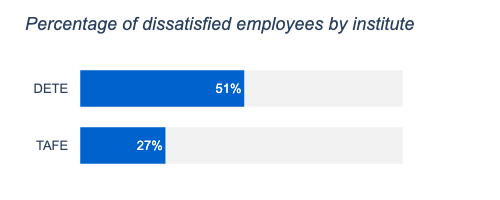

In [51]:
institute_info = generate_table(combined, 'institute', 'dissatisfied')
fig = plot_table(institute_info, 'Percentage of dissatisfied employees by institute')
fig.update_layout(height=200, width=500)
fig.show('png')

*The DETE Institute recorded a greater number of employees resigning due to dissatisfaction. Infact the dissatisfaction rates observed in DETE are almost twice as much as those recorded in the TAFE institute*.

This huge difference in dissatisfaction rates has a potential to significantly skew our analysis results. To ensure that we obtain the best insights possible, we will first conduct a general analysis of the combined data, then dive deeper to explore the differences between DETE and TAFE for each analysis question.

## Dissatisfaction and Service Years

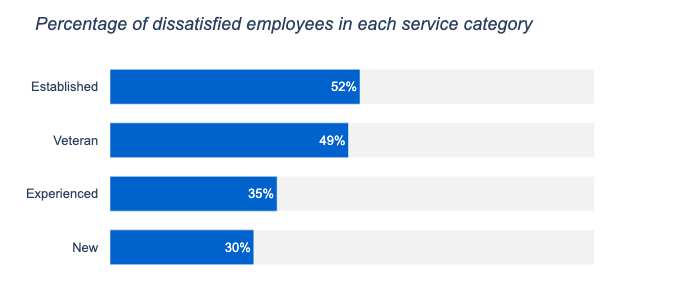

In [52]:
service_info = generate_table(combined, 'service_category', 'dissatisfied')
fig = plot_table(service_info, 'Percentage of dissatisfied employees in each service category')
fig.update_layout(height=300, width=700)
fig.show('png')

*It appears that employees who spend longer at these institutes are more likely to resign due to dissatisfaction. Established employees and Veterans are more likely to be dissatisfied than experienced or new employees. In otherwords, employees who have spent 7 years or more are more likely to resign due to dissatisfaction than those who have spent lesser than 7 years.*

## Dissatisfaction and Age

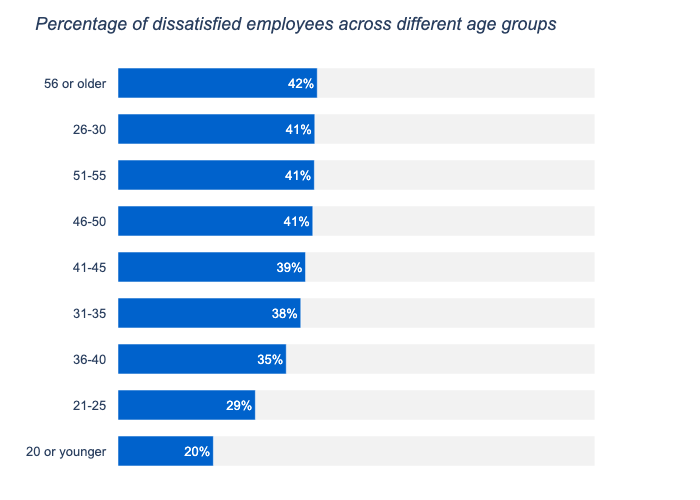

In [53]:
age_info = generate_table(combined, ['age'], 'dissatisfied')
age_info
fig = plot_table(age_info, 'Percentage of dissatisfied employees across different age groups')
fig.update_layout(height=500, width=700)
fig.show('png')

*Our plot doesn't show a clear pattern here. Although we see that older employees are more likely to resign due to dissatisfaction, we cannot confidently conclude because younger employees of age 26-30 also show high dissatisfaction rates*.

Perhaps we could turn our attention to the age structure we previously created. This may give us clearer insights into the underlying central pattern.

## Dissatisfaction and Age Structure

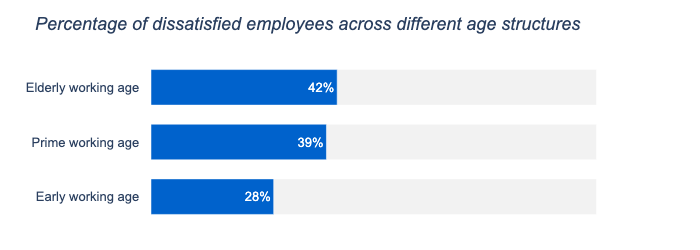

In [54]:
age_structure_info = generate_table(combined, ['age_structure'], 'dissatisfied')
age_structure_info
fig = plot_table(age_structure_info, 'Percentage of dissatisfied employees across different age structures')
fig.update_layout(height=250, width=700)
fig.show('png')

*The age structure informs us clearer and better! Employee dissatisfaction increases with age, leading to more resignations among older employees. Younger employees are less likely to resign due to dissatisfaction.*

## Gender and Dissatisfaction

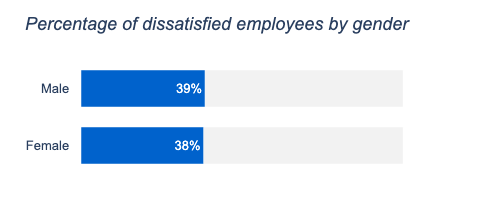

In [55]:
gender_info = generate_table(combined, ['gender'], 'dissatisfied')
gender_info
fig = plot_table(gender_info, 'Percentage of dissatisfied employees by gender')
fig.update_layout(height=200, width=500)
fig.show('png')

*It appears that gender doesn't exert so much influence on dissatisfaction. However, male employees have a marginally higher tendency to resign due to dissatisfaction than their female counterparts*.

## Dissatisfaction and Contract Type

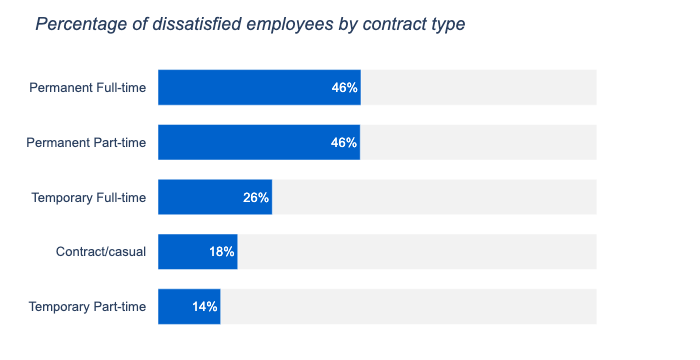

In [56]:
employment_info = generate_table(combined, ['employment_status'], 'dissatisfied')
employment_info
fig = plot_table(employment_info, 'Percentage of dissatisfied employees by contract type')
fig.update_layout(height=360, width=700)
fig.show('png')

*As employee contracts become more permanent, dissatisfaction is more likely to occur. Permanent employees suffer a larger share of dissatisfaction than temporary employees and casual workers.*

## Dissatisfaction and Role

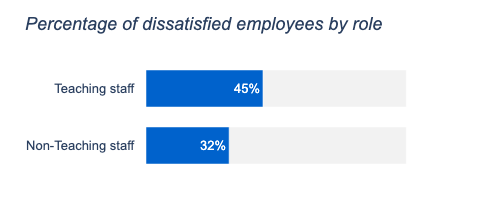

In [57]:
role_info = generate_table(combined, ['role'], 'dissatisfied')
role_info
fig = plot_table(role_info, 'Percentage of dissatisfied employees by role')
fig.update_layout(height=200, width=500)
fig.show('png')

*Teaching staff are more likely to resign due to dissatisfaction than staff who carry out administrative or other non-teaching related roles.*

## Data Analysis II
In the second aspect of our analysis, we will consider and compare the influence of each factor on resignation across both institutes. This is primarily because of the largely unequal dissatisfaction rates that we obeserved between DETE and TAFE employees.

Again, we will define two helper functions. The `create_subplot()` function helps to generate high quality subplots from both datasets while the `sort_by_df()` function sorts a dataframe based on a specified columns in another dataframe: this is especially useful when we want our graphs to have the same arrangement of data labels.

In [58]:
def create_subplot(first, second, main_title):
    """
        Builds a subplot from provided arguments.
        Params:
            :first(dataframe): first dataframe of interest
            :second(dataframe): second dataframe of interest
            :main_title(string): name of chart
        Output:
            Subplots containing barcharts from both dataframes.
    """
    
    fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.2,
                    subplot_titles=('DETE', 'TAFE'))
    
    x_val, y_val, ref_val = first.columns[1], first.columns[0], first.columns[2]
    
    fig.add_trace(go.Bar(y=first[y_val], x=first[x_val],
                         orientation='h', marker_color='#2E7D9E', text= first[x_val]
        ), row=1, col=1)
    
    fig.add_trace(go.Bar(y=first[y_val], x=first[ref_val],
                         orientation='h', marker_color='grey', opacity=0.1
        ), row=1, col=1)

    fig.add_trace(go.Bar(y=second[y_val], x=second[x_val],
                         orientation='h', marker_color='#A36A69', text= second[x_val]
        ), row=1, col=2)

    fig.add_trace(go.Bar(y=second[y_val], x=second[ref_val],
                         orientation='h', marker_color='grey', opacity=0.1
        ), row=1, col=2)


    fig.data[0].texttemplate='%{text:.0f}%'
    fig.data[2].texttemplate='%{text:.0f}%'
    
    fig.update_yaxes(showline=False, title='', ticksuffix='   ')
    fig.update_xaxes(title='', showticklabels=False, showgrid=False, zeroline=False)
    fig.update_layout(template='plotly_white', showlegend=False, font_family='arial', font_size=13,
                     title= '<i>'+main_title, bargap=0.35, margin_b=0, barmode='stack')
    
    return fig


def sort_by_df(input_df, sorting_column, sorting_df):
    """
        Sorts a dataframe by a set column in another dataframe
        Params:
            :input_df (dataframe): dataframe to sort
            :sorting_column(string): name of column in sorting_df to sort by
            :sorting_df(dataframe): dataframe to sort from
        Output:
            An input dataframe sorted by the column specified in the sorting dataframe.
    """
    result = input_df.set_index(sorting_column)
    result = result.reindex(index=sorting_df[sorting_column])
    result = result.reset_index()
    return result

We will proceed to seperate DETE related data from TAFE related data by filtering the `combined` dataframe:

In [59]:
dete = combined.query("institute == 'DETE'")
tafe = combined.query("institute == 'TAFE'")

## Dissatisfaction and Service Years

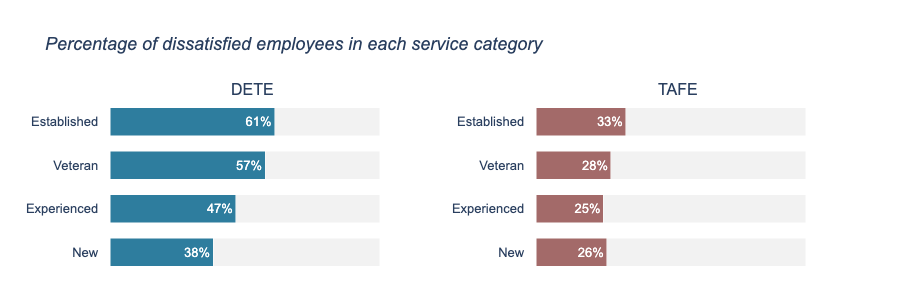

In [60]:
# Use the generate_table function to pull relevant service_year information from both datasets
dete_service_info = generate_table(dete, ['service_category'], 'dissatisfied')
tafe_service_info = generate_table(tafe, ['service_category'], 'dissatisfied')

# Arrange the tafe service info dataset in the same order as dete service info
tafe_service_info = sort_by_df(tafe_service_info, 'service_category', dete_service_info)

# Generate subplot
fig = create_subplot(dete_service_info, tafe_service_info,
                    'Percentage of dissatisfied employees in each service category')
fig.update_layout(height=300, width=900)
fig.show('png')

*Across both institutes, dissatisfaction tends to increase with the number of service years. This pattern is prominent among DETE employees (higher percentages) while subtle among TAFE employees (smaller percentages). New TAFE employees are more likely to resign due to dissatisfaction than experienced employees, although the difference is only marginal*.

## Dissatisfaction and Age

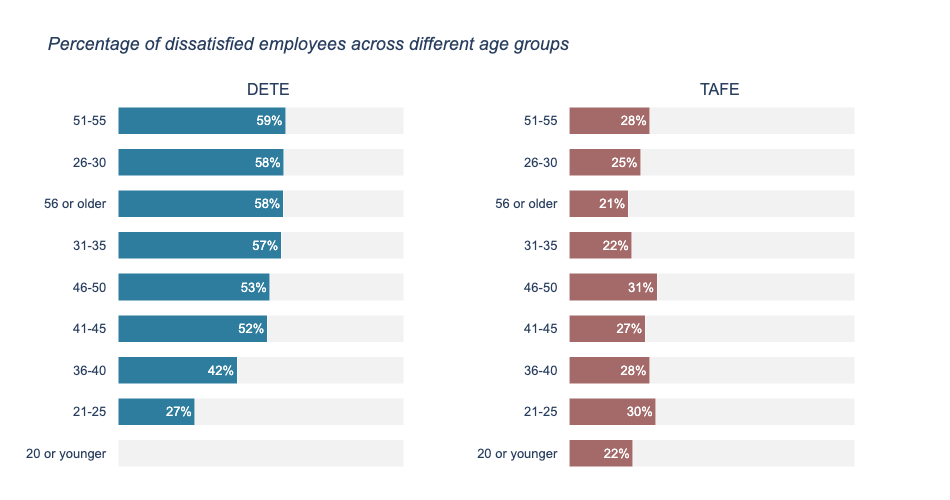

In [61]:
dete_age_info = generate_table(dete, ['age'], 'dissatisfied')
tafe_age_info = generate_table(tafe, ['age'], 'dissatisfied')

tafe_age_info = sort_by_df(tafe_age_info, 'age', dete_age_info)

fig = create_subplot(dete_age_info, tafe_age_info,
                     'Percentage of dissatisfied employees across different age groups')
fig.update_layout(height=500, width=950)
fig.show('png')

*It is evident that both institutes conform to different of variations of dissatisfaction among different age groups. While older employees are more likely to be dissatisfied in DETE, dissatisfaction is rampant among younger TAFE employees. This variation, though present, is not very clear. We can obtain a more informed view by further considering the age structures across both institutions*.

## Dissatisfaction and Age Structure

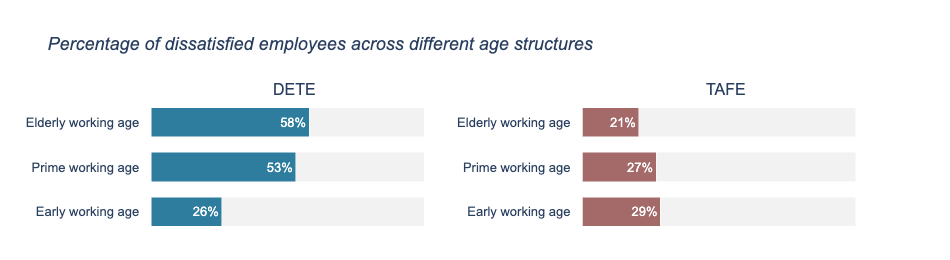

In [62]:
dete_age_structure = generate_table(dete, ['age_structure'], 'dissatisfied')
tafe_age_structure = generate_table(tafe, ['age_structure'], 'dissatisfied')

tafe_age_structure = sort_by_df(tafe_age_structure, 'age_structure', dete_age_structure)

fig = create_subplot(dete_age_structure, tafe_age_structure,
                     'Percentage of dissatisfied employees across different age structures')
fig.update_layout(height=260, width=950)
fig.show('png')

*The age structure provides a clearer pattern. At DETE dissatisfaction rises with age, while at TAFE, it decreases with Age. Again, the levels of dissatisfaction obeserved at DETE are much higher than those observed at TAFE.*

## Gender and Dissatisfaction

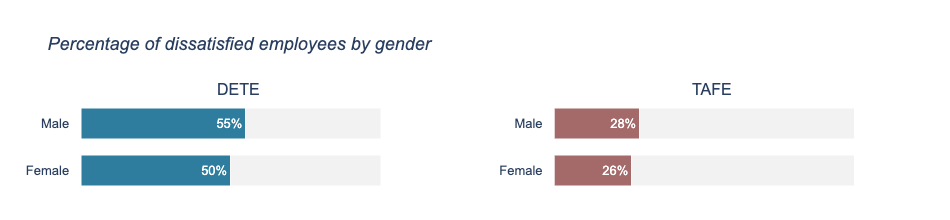

In [63]:
dete_gender_info = generate_table(dete, ['gender'], 'dissatisfied')
tafe_gender_info = generate_table(tafe, ['gender'], 'dissatisfied')

tafe_gender_info = sort_by_df(tafe_gender_info, 'gender', dete_gender_info)

fig = create_subplot(dete_gender_info, tafe_gender_info,
                     'Percentage of dissatisfied employees by gender')
fig.update_layout(height=220, width=950)
fig.show('png')

*Males are more likely to get dissatisfied and resign in both institutes. The only difference is how much more. At DETE there is a considerable difference between the rates of dissatisfaction among males than females (55% vs 50%). At TAFE this difference is milder (28% of males vs 26% of females)*.

## Dissatisfaction and Contract Type

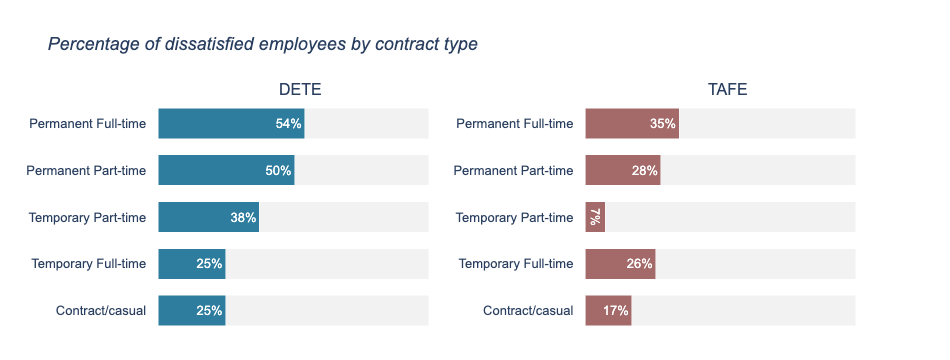

In [64]:
dete_employment_status_info = generate_table(dete, ['employment_status'], 'dissatisfied')
tafe_employment_status_info = generate_table(tafe, ['employment_status'], 'dissatisfied')

tafe_employment_status_info = sort_by_df(tafe_employment_status_info, 'employment_status', 
                                         dete_employment_status_info)

fig = create_subplot(dete_employment_status_info, tafe_employment_status_info,
                     'Percentage of dissatisfied employees by contract type')
fig.update_layout(height=360, width=950)
fig.show('png')

*Both institutes show the same overall pattern: permanent employees showed higher dissatisfaction rates than temporary and casual/contract based employees. At TAFE, temporary part-time employees showed the least rates of dissatisfaction (7%).*

## Dissatisfaction and Role

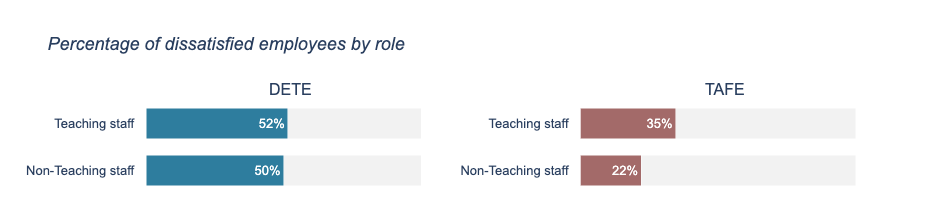

In [65]:
dete_role_info = generate_table(dete, ['role'], 'dissatisfied')
tafe_role_info = generate_table(tafe, ['role'], 'dissatisfied')

tafe_role_info = sort_by_df(tafe_role_info, 'role', dete_role_info)

fig = create_subplot(dete_role_info, tafe_role_info,
                     'Percentage of dissatisfied employees by role')
fig.update_layout(height=220, width=950)
fig.show('png')

*Teaching staff showed more dissatisfaction rates than non-teaching staff. This difference is not very pronounced in DETE (52% teaching vs 50% non-teaching). TAFE shows a more observable difference with 13% more teaching staff resigning due to dissatisfaction when compared to non-teaching staff (35% vs 22%).*

## Conclusion
From our analysis, we learned the relationship between various factors and resignation due to dissatisfaction. These factors included years of service, gender, age, contract type and job role. 

In general, we observed that 51% of DETE's resigning workforce are leaving dissatisfied while at TAFE this percentage is 27%. Established and veteran employees are more likely to leave dissatisfied. A deeper dive into the data shows an interesting perspective: dissatisfaction positively correlates with employee age and length of service at the DETE institute while at TAFE, the reverse is the case (dissatisfaction correlated negatively with age and length of service).

Common to both institutes, gender doesn’t seem to exert much influence on employee dissatisfaction, but males showed slightly higher propensity to be dissatisfied than females. The majority of employees on permanent contracts reported more dissatisfaction than temporary or casually employed employees, and staff who worked in teaching roles resigned more, due to dissatisfaction, than non-teaching staff.


## Recommendation
The DETE management could consider Improvements to, or addition of, wellness programs to help older employees. Employee Wellness Programs have been shown to be one of the most effective strategies to increase employee morale, health, and productivity. This can also help reduce stress and work/life balance Issues.

TAFE on the other hand, is struggling to retain its new employees. The management should invest in comprehensive onboarding for new employees. Leaders should teach them how things work, define what good looks like and build a sense of community. This fosters a positive work environment and reduces role overload.

Employees of all categories should feel like they are using their skills, knowledge and abilities to their fullest extent. Feedback and recognition should be regularly provided, so employees feel appreciated for the work they do.


## Limitation
While it might appear that DETE employees are more likely to resign due to dissatisfaction, there were simply more survey answers that corresponded to a 'dissatisfied' outcome in the DETE survey. The TAFE survey had fewer answers [see data cleaning section 8](#ref). This inequality in the way the surveys were handled could pose a limitation in this project.

Dissatisfaction results were also handled as either 'dissatisfied' or 'not dissatisfied', as opposed to, for instance, having employees rate their dissatisfaction **on a scale of 1-10**. The latter might have reflected employee sentiment more accurately, as it represents a spectrum of satisfaction that tends to correspond better to a person's actual feelings.